# **Очистка  и обработка данных**

In [2]:
import pandas as pd

Загрузим датасет, который мы получили после парсинга данных со стены сообщества.

In [6]:
df = pd.read_csv('project_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,date,likes,reposts,views,comments,attachments,text
0,31701,1681698600,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...
1,51009,1714739400,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс..."
2,50998,1714725000,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ..."
3,50989,1714714200,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽
4,50983,1714703400,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤


Опишем полученные данные в таблице по столбцам:

*   unnamed: 0 - id поста
*   date - дата поста
*   likes - количество лайков
*   reposts - количество репостов
*   views - количество просмотров
*   comments - количество комментариев
*   attachments - количество вложений
*   text - текст поста


Дальше преобразуем столбец text в несколько разных. Посты в паблике делятся на два типа: те, в которых есть информация о фильме и режиссере, а также те, в которых есть просто фотографии актеров. Первый тип можно дополнительно обработать, вычленив название фильма, имя режиссера и год производства фильма благодаря достаточно строгому naming convention у авторов паблика. С помощью регулярных выражений выделим отдельные столбцы с названием фильмов, именами режиссеров и годами производства.
Иногда после этой информации еще есть дополнительное описание сюжета фильма, который мы вынесли в столбец additional info также для постов, в которых нет строгой информации о фильмах и режиссерах.






In [8]:
df['movie'] = df['text'].str.extract(r'^«(.+?)»')
df['director'] = df['text'].str.extract(r'Режисс[ёе]р(?:ы)?: (.+?)(?:\.|$)')
df['director'] = df['director'].str.replace(r',', '|').str.split('|').apply(lambda x: ', '.join([i.strip() for i in x]) if isinstance(x, list) else x)
df['year'] = df['text'].str.extract(r'(\d{4})')

In [9]:
df['additional_info'] = df['text'].str.replace(r'^«(.+?)»|Режисс[ёе]р(?:ы)?: (.+?)\.|\d{4}|год', '', regex=True).str.strip()
df['additional_info'] = df['additional_info'].str.replace(r'^\s*,\s*', '', regex=True)
df['additional_info'] = df['additional_info'].str.replace(r'\n', '', regex=True)
df['additional_info'] = df['additional_info'].str.replace(r'^\.', '', regex=True)

На всякий случай преобразуем формат столбца с датами.

In [10]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)

In [11]:
df.head()

,Unnamed: 0,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info
0,31701,1681698600,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...
1,51009,1714739400,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,
2,50998,1714725000,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у..."
3,50989,1714714200,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽
4,50983,1714703400,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤


Мы также собрали датасет по трем самым престижным премиям: оскару, золотой пальмовой ветви и золотому глобусу. По оскару были доступны данные на русском в том числе по номинантам, а по золотой пальмовой ветви и золотому глобусу - только по лауреатам, так что мы внесем данные по номинантам и лауреатам оскара, лауреатам золотой пальмовой ветви и золотого глобуса.

Начнем с данных по оскару.

In [13]:
oscar = pd.read_excel('oscar.xlsx')

In [14]:
oscar.head()

,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Победитель
0,1929,«Крылья»,Paramount Pictures,Люсьен Хаббард,1
1,1929,«Рэкет»,Paramount Pictures,Говард Хьюз,0
2,1929,«Седьмое небо»,Fox Film Corporation,Уильям Фокс,0
3,1930,«Бродвейская мелодия»,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",1
4,1930,«Алиби»,United Artists,Роланд Уэст,0


Тут формат данных по названию фильма не совпадал с тем, что есть у нас в таблице, поэтому преобразуем названия в таблице oscar к нашему формату.

In [15]:
oscar['Фильм'] = oscar['Фильм'].str.replace('«', '').str.replace('»', '').str.strip()

Все фильмы в датасете - номинанты. Поэтому сделаем еще один столбец-флаг того, что фильм-номинант.

In [16]:
oscar['oscar_nominee'] = 1

Тут мы убираем ненужные столбцы, которые будут затормаживать процесс склейки таблиц.

In [17]:
oscar = oscar.drop(['Кинокомпания(и)', 'Продюсер(ы)', 'Год/Церемония'], axis=1)

Джойн таблиц слева, потому что мы не хотим потерять данные по фильмам, которые не были номинированы.

In [18]:
df1 = pd.merge(df, oscar, left_on='movie', right_on='Фильм', how='left')

In [19]:
df1.head()

,Unnamed: 0,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,Фильм,Победитель,oscar_nominee
0,31701,1681698600,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,NaN
1,51009,1714739400,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,,NaN,NaN,NaN
2,50998,1714725000,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",NaN,NaN,NaN
3,50989,1714714200,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,NaN,NaN,NaN
4,50983,1714703400,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,NaN


In [20]:
df1 = df1.rename(columns = {'Победитель' : 'oscar_winner'})

In [21]:
df1.head()

,Unnamed: 0,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,Фильм,oscar_winner,oscar_nominee
0,31701,1681698600,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,NaN
1,51009,1714739400,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,,NaN,NaN,NaN
2,50998,1714725000,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",NaN,NaN,NaN
3,50989,1714714200,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,NaN,NaN,NaN
4,50983,1714703400,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,NaN


Мы заметили, что часто строки, содержащие название фильма, который был номинирован, все равно маркируются как отсутствующие данные в столбцах про номинантов и победителей премии. Поэтому мы написали функцию, которая это будет поправлять.

In [22]:
def update_oscar_nominee(row):
    if pd.notnull(row['movie']) and row['oscar_nominee'] != 1:
        return 0
    else:
        return row['oscar_nominee']



# Применение функции к DataFrame
df1['oscar_nominee'] = df1.apply(update_oscar_nominee, axis=1)

То же самое касалось и столбца победителей премии.

In [23]:
def update_oscar_winner(row):
    if row['oscar_nominee'] == 0:
        return 0
    elif pd.isna(row['oscar_winner']):
        return 0
    else:
        return row['oscar_winner']
df1['oscar_winner'] = df1.apply(update_oscar_winner, axis = 1)

Теперь проанализируем лауреатов премии **"Золотая Пальмовая Ветвь"**

In [24]:
palme = pd.read_excel('palme.xlsx')

In [25]:
palme.head()

,Год,Название фильма,Режиссер
0,1939,Юнион Пасифик,Сесил Би Демилль
1,1946,Травля,Альф Шёберг
2,1946,Потерянный уикенд,Билли Уайлдер
3,1946,Красные луга,"Бодиль Ипсен, Лау Лауритцен мл."
4,1946,Город в долине,Четан Ананд


Снова добавим флаг того, что фильм в строке - лауреат.

In [26]:
palme['palme_winner'] = 1

Склеим с уже имеющимся датасетом.

In [27]:
df2 = pd.merge(df1, palme, left_on='movie', right_on='Название фильма', how='left')

Отбросим ненужные столбцы, которые дублируют информацию.

In [28]:
df2 = df2.drop(['Год', 'Название фильма', 'Режиссер'], axis = 1)

Здесь вновь была проблема с тем, что не все фильмы маркировались верно, поэтому мы вновь применили функцию для более корректной маркировки победителей и фильмов, не получивших награду.

In [29]:
def update_palme_winner(row):
    if pd.notnull(row['movie']) and row['palme_winner'] != 1:
        return 0
    else:
        return row['palme_winner']

In [30]:
df2['palme_winner'] = df2.apply(update_palme_winner, axis=1)

Переименовываем столбец для более корректного отображения информации о датасете.

In [31]:
df2 = df2.rename(columns = {'Unnamed: 0' : 'post_id'})

Теперь добавим информацию о лауреатах премии **"Золотой глобус"**.

In [32]:
golden_globe = pd.read_excel('golden_globe.xlsx')

In [33]:
golden_globe

,Год,Фильм,Режиссёр,Продюсер,Победитель
0,1944,Песня Бернадетт,Генри Кинг,Уильям Перлберг,1
1,1945,Идти своим путём,Лео Маккэри,Лео Маккэри,1
2,1946,Потерянный уикэнд,Билли Уайлдер,Чарльз Брэкетт,1
3,1947,Лучшие годы нашей жизни,Уильям Уайлер,Сэмюэл Голдвин,1
4,1948,Джентльменское соглашение,Элиа Казан,Дэррил Занук,1
...,...,...,...,...,...
381,2024,Анатомия падения,Жюстин Трие,Дэвид Тион,0
382,2024,Зона интересов,Джонатан Глейзер,Джеймс Уилсон,0
383,2024,Маэстро,Брэдли Купер,Мартин Скорсезе,0
384,2024,Прошлые жизни,Селин Сонг,Кристин Вашон,0


Джойним два датасета по названию фильма и переименовываем столбец для соблюдения naming convention.

In [34]:
df3 = pd.merge(df2, golden_globe, left_on='movie', right_on='Фильм', how='left')
df3 = df3.rename(columns = {'Победитель' : 'globe_winner'})


In [35]:
golden_globe.columns

Index(['Год', 'Фильм', 'Режиссёр', 'Продюсер', 'Победитель'], dtype='object')

Отбрасываем ненужные столбцы, которые содержат лишнюю информацию или дублируют ее.

In [36]:
df3 = df3.drop(['Год', 'Фильм_y','Продюсер', 'Режиссёр', 'Фильм_x'], axis = 1)

Поскольку в дальнейшем нам пригодится знание о том, какие строки содержат фильмы, то мы добавим столбец с флагом наличия фильма.

In [37]:
df3['movie_flg'] = pd.notnull(df3['movie'])

Нам вновь потребовалось избавиться от большого количества отсутствующих данных посредством заполнения столбца победителей с помощью функции.

In [38]:
def update_globe_winner(row):
    if pd.notnull(row['movie']) and row['globe_winner'] == 1:
        return 1
    elif pd.notnull(row['movie']) and row['globe_winner'] != 1:
        return 0
    else:
      return row['globe_winner']

In [39]:
df3['globe_winner'] = df3.apply(update_globe_winner, axis=1)

# **EDA**

In [40]:
df3.head()

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
0,31701,1681698600,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...,0.0,NaN,NaN,NaN,False
1,51009,1714739400,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,,0.0,0.0,0.0,0.0,True
2,50998,1714725000,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",0.0,0.0,0.0,0.0,True
3,50989,1714714200,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,0.0,NaN,NaN,NaN,False
4,50983,1714703400,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,0.0,NaN,NaN,NaN,False


Еще раз опишем данные в итоговом датасете:
* post_id - номер поста
* data - дата публикации поста (не в формате даты, поэтому этот столбец можно убрать)
* likes - количестов лайков
* reposts - количество репостов у поста
* views - количество просмотров
* comments - количество комментариев
* attachments - количество нетекстовых приложений к посту (фотографии)
* text - полный текст поста
* movie - название фильма, который упоминается в посте
* director - имя режиссера
* year - год публикации фильма
* additional info - текст в посте помимо названия фильма, режиссера и года выпуска
* oscar_winner - 0 или 1, где 0 - фильм не выиграл Оскар, 1 - фильм выиграл Оскар
* oscar_nominee - NaN, 0 или 1, где NaN - в посте нет информации о фильме, 0 - фильм не был номинирован на Оскар, 1 - фильм был номинирвован на Оскар
* palme_winner - 0 или 1, где 0 - фильм не выиграл Золотую Пальмовую Ветвь, 1 - выиграл
* globe_winner - Nan, 0 или 1, где NaN - в посте нет информации о фильме, 0 - фильме не выиграл Золотой Глобус, 1 фильм выиграл Золотой Глобус
* movie_flg - 0 или 1, где 0 - пост посвящен не фильму (например, в посте упоминается какой-то актер, набор фотографий или визуальное сравнение нескольких фильмов), 1 - пост посвящен фильму

Проверим данные на пропуски

In [41]:
df3.isna().sum()

post_id              0
date                 0
likes                0
reposts              0
views                0
comments             0
attachments          0
text                 9
movie              354
director           364
year                 0
additional_info      9
oscar_winner         0
oscar_nominee      354
palme_winner       354
globe_winner       354
movie_flg            0
dtype: int64

Пустые значения в столбцах text и additional_info объясняются наличием постов только с картинками, оставим их для анализа. Пустые значения в столбцах movie, oscar_nominee, palme_winner и globe_winner объясняются наличием постов без информации о фильмах (то есть это посты с movie_flg=False). Мы выделим эти посты в отдельную группу и будем анализировать отдельно. Посмотрим на столбец director. 354 пустых значения в нем вызваны теми же причинами (отсутствие фильма в тексте поста), рассмотрим остальные 10:

In [42]:
df3[df3['movie'].notnull() & df3['director'].isnull()]

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
36,50675,1714282200,469,985,35152,20,9,«Извращенное» кино 📽,Извращенное,NaN,0,кино 📽,0.0,0.0,0.0,0.0,True
52,50486,1714059000,707,267,24697,38,1,"«X», 2022 // «Пэрл», 2022 // «Максин XXX», 2024",X,NaN,2022,"// «Пэрл», // «Максин XXX»,",0.0,0.0,0.0,0.0,True
95,50022,1713515400,185,49,11788,3,9,"«Ла-Ла Ленд», 2016 // «Джокер: Безумие на двои...",Ла-Ла Ленд,NaN,2016,"// «Джокер: Безумие на двоих»,",0.0,1.0,0.0,0.0,True
152,49413,1712763000,103,87,16511,3,4,«Вампирша-гуманистка ищет отчаянного доброволь...,Вампирша-гуманистка ищет отчаянного добровольца,NaN,0,Режиссер: Ариан Луи-СэзС 11 апреля в кино,0.0,0.0,0.0,0.0,True
174,49127,1712467800,390,563,64057,8,9,«Горько-сладкие» фильмы 📽,Горько-сладкие,NaN,0,фильмы 📽,0.0,0.0,0.0,0.0,True
270,48053,1711121400,626,512,63491,11,4,"«Бедные-несчастные», 2023 // «Франкеншл*ха», 1990",Бедные-несчастные,NaN,2023,"// «Франкеншл*ха»,",0.0,1.0,0.0,0.0,True
329,47534,1710325800,27,16,8724,0,4,«Демоны дома Гарретов»\nРежиссер: Пэрис Зарсил...,Демоны дома Гарретов,NaN,0,Режиссер: Пэрис ЗарсильяС 14 марта в кино,0.0,0.0,0.0,0.0,True
442,46242,1708752600,75,62,8742,0,9,«Церковь Сатаны» 📽,Церковь Сатаны,NaN,0,📽,0.0,0.0,0.0,0.0,True
454,46137,1708597800,37,38,9600,1,9,"«Свет», 2022\nРежиссер: Антон Коломеец\n\nВ жи...",Свет,NaN,2022,Режиссер: Антон КоломеецВ жизни каждого челове...,0.0,0.0,0.0,0.0,True
688,44369,1705487400,125,35,8563,3,9,"«Принцесса Мононоке», 1997\nРежиссер: Хаяо Мия...",Принцесса Мононоке,NaN,1997,Режиссер: Хаяо МиядзакиС 18 января в кинотеатрах,0.0,0.0,0.0,0.0,True


3 поста содержат подборки фильмов (строки 36, 174 и 442). Удалим их, так как они не подходят ни в одну категорию постов.

In [43]:
df3 = df3.drop(index = [36, 174, 442])
df3[df3['movie'].notnull() & df3['director'].isnull()]

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
52,50486,1714059000,707,267,24697,38,1,"«X», 2022 // «Пэрл», 2022 // «Максин XXX», 2024",X,NaN,2022,"// «Пэрл», // «Максин XXX»,",0.0,0.0,0.0,0.0,True
95,50022,1713515400,185,49,11788,3,9,"«Ла-Ла Ленд», 2016 // «Джокер: Безумие на двои...",Ла-Ла Ленд,NaN,2016,"// «Джокер: Безумие на двоих»,",0.0,1.0,0.0,0.0,True
152,49413,1712763000,103,87,16511,3,4,«Вампирша-гуманистка ищет отчаянного доброволь...,Вампирша-гуманистка ищет отчаянного добровольца,NaN,0,Режиссер: Ариан Луи-СэзС 11 апреля в кино,0.0,0.0,0.0,0.0,True
270,48053,1711121400,626,512,63491,11,4,"«Бедные-несчастные», 2023 // «Франкеншл*ха», 1990",Бедные-несчастные,NaN,2023,"// «Франкеншл*ха»,",0.0,1.0,0.0,0.0,True
329,47534,1710325800,27,16,8724,0,4,«Демоны дома Гарретов»\nРежиссер: Пэрис Зарсил...,Демоны дома Гарретов,NaN,0,Режиссер: Пэрис ЗарсильяС 14 марта в кино,0.0,0.0,0.0,0.0,True
454,46137,1708597800,37,38,9600,1,9,"«Свет», 2022\nРежиссер: Антон Коломеец\n\nВ жи...",Свет,NaN,2022,Режиссер: Антон КоломеецВ жизни каждого челове...,0.0,0.0,0.0,0.0,True
688,44369,1705487400,125,35,8563,3,9,"«Принцесса Мононоке», 1997\nРежиссер: Хаяо Мия...",Принцесса Мононоке,NaN,1997,Режиссер: Хаяо МиядзакиС 18 января в кинотеатрах,0.0,0.0,0.0,0.0,True


Еще 3 поста содержат информацию о нескольких фильмах сразу (строки 52, 95 и 270). Их мы отнесем в группу с постами, в которых нет упоминания фильмов, так как такие посты содержат картинки со сравнением двух фильмов.

Оставшиеся 4 поста - это посты, где авторы нарушили naming convention постов, из-за чего код не смог правильно отделить режиссера и дополнительный текст. Сделаем это вручную:

In [44]:
df3.loc[df3['movie']=='Вампирша-гуманистка ищет отчаянного добровольца', 'director'] = 'Ариан Луи-Сэз'
df3.loc[df3['movie']=='Вампирша-гуманистка ищет отчаянного добровольца', 'additional_info'] = 'С 11 апреля в кино'

In [45]:
df3.loc[df3['movie']=='Демоны дома Гарретов', 'director'] = 'Пэрис Зарсилья'
df3.loc[df3['movie']=='Демоны дома Гарретов', 'additional_info'] = 'С 14 марта в кино'

In [46]:
df3.loc[df3['movie']=='Свет', 'director'] = 'Антон Коломеец'
df3.loc[df3['movie']=='Свет', 'additional_info'] = 'В жизни каждого челове...'

In [47]:
df3.loc[df3['movie']=='Принцесса Мононоке', 'director'] = 'Хаяо Миядзаки'
df3.loc[df3['movie']=='Принцесса Мононоке', 'additional_info'] = 'С 18 января в кинотеатрах'

In [48]:
df3[df3['movie'].notnull() & df3['director'].isnull()]

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
52,50486,1714059000,707,267,24697,38,1,"«X», 2022 // «Пэрл», 2022 // «Максин XXX», 2024",X,NaN,2022,"// «Пэрл», // «Максин XXX»,",0.0,0.0,0.0,0.0,True
95,50022,1713515400,185,49,11788,3,9,"«Ла-Ла Ленд», 2016 // «Джокер: Безумие на двои...",Ла-Ла Ленд,NaN,2016,"// «Джокер: Безумие на двоих»,",0.0,1.0,0.0,0.0,True
270,48053,1711121400,626,512,63491,11,4,"«Бедные-несчастные», 2023 // «Франкеншл*ха», 1990",Бедные-несчастные,NaN,2023,"// «Франкеншл*ха»,",0.0,1.0,0.0,0.0,True


Здесь остались посты, в которых сравниваются кадры из разных фильмов, но поскольку они содержат только визуальную информацию и не рассматривают конкретный фильм, то мы будем считать это просто постами второй категории.

Мы разобрались с пропусками. Уберем также неинформативные столбцы с ID поста и датой.

In [49]:
df3 = df3.drop(['post_id', 'date'], axis = 1)
df3.head()

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
0,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...,0.0,NaN,NaN,NaN,False
1,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,,0.0,0.0,0.0,0.0,True
2,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",0.0,0.0,0.0,0.0,True
3,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,0.0,NaN,NaN,NaN,False
4,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,0.0,NaN,NaN,NaN,False


Посмотрим, как распредлены числовые данные и есть ли в них выбросы.

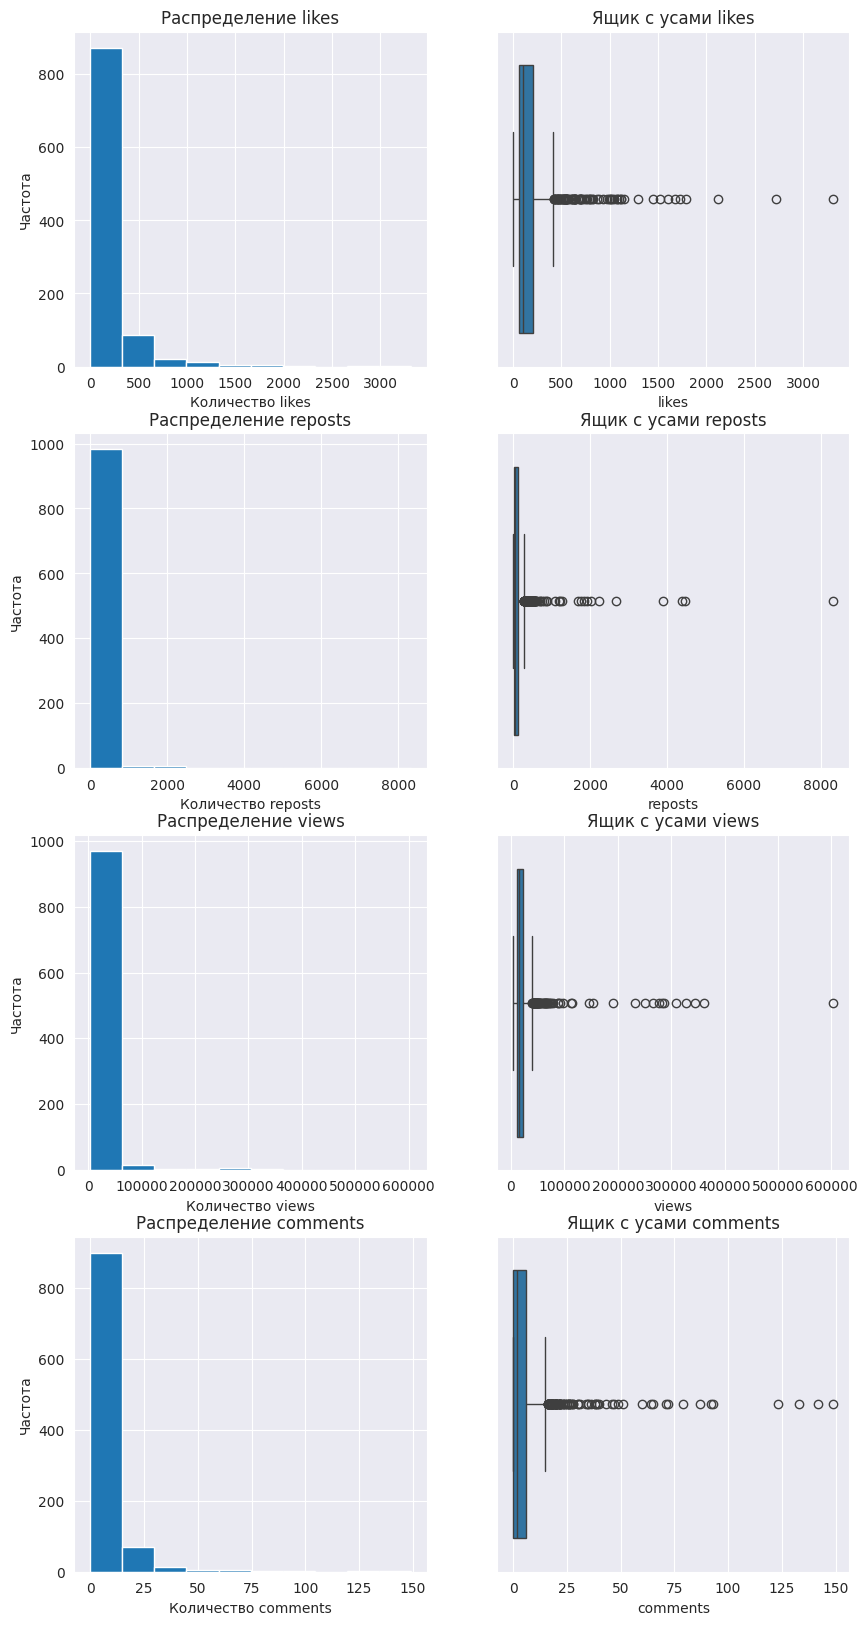

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
var_num = ['likes', 'reposts', 'views', 'comments']

sns.set_style('darkgrid')
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
for i in range(len(var_num)):
    ax[i][0].set_title(f'Распределение {var_num[i]}')
    ax[i][1].set_title(f'Ящик с усами {var_num[i]}')
    ax[i][0].hist(df3[var_num[i]])
    ax[i][0].set_xlabel(f'Количество {var_num[i]}')
    ax[i][0].set_ylabel('Частота')
    sns.boxplot(x=df3[var_num[i]], ax=ax[i, 1])

Из графиков видно, что выбросы есть, причем достаточно много. Для сглаживания распределения сначала прологарифмируем графики.

In [51]:
import numpy as np
for i in var_num:
  df3[f'log_{i}'] = np.log(df3[i]+1) #прибавляем 1, так как в столбцах есть нули (особенно много нулей в колонке comments)

Так выглядят распределения после логарифмирования:

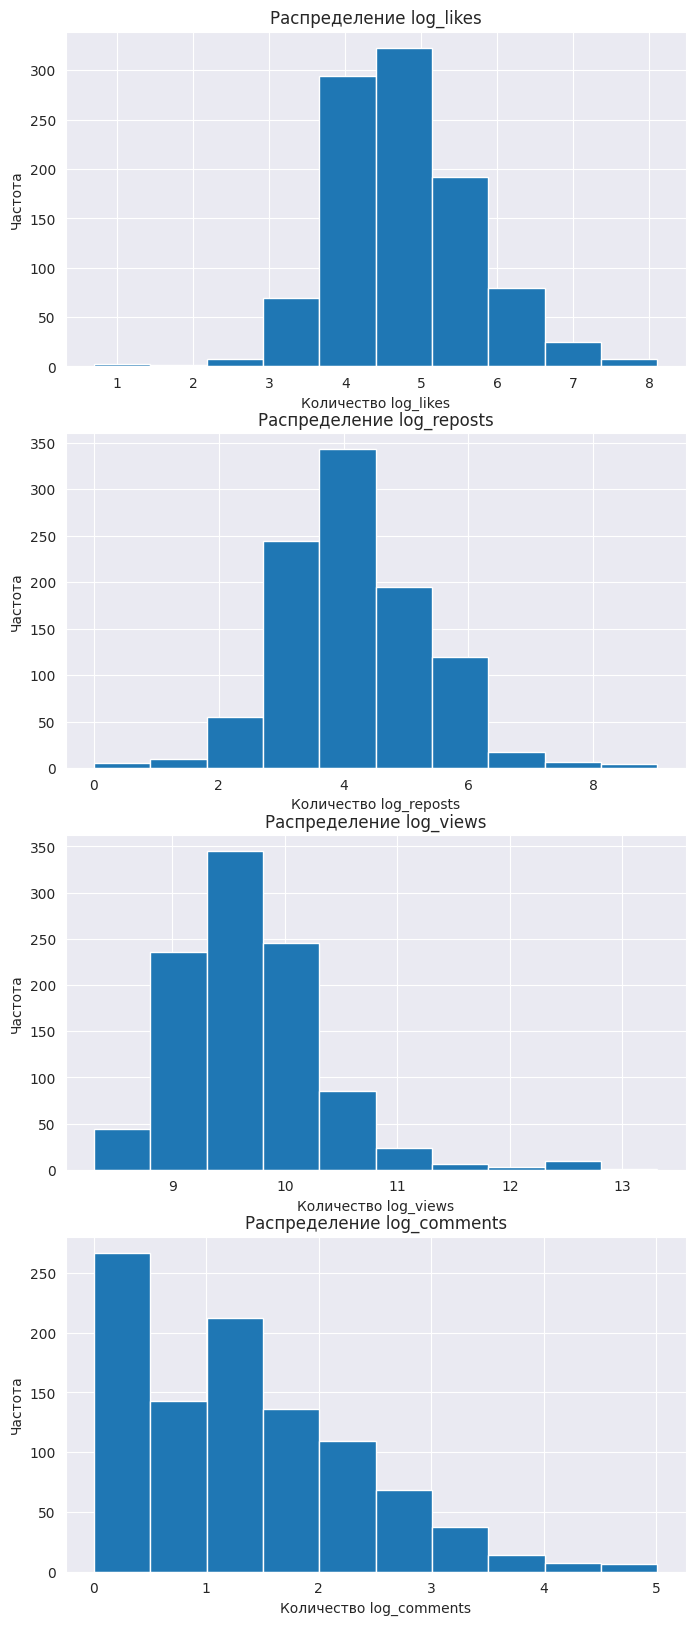

In [52]:
log_var_num = ['log_likes', 'log_reposts', 'log_views', 'log_comments']
sns.set_style('darkgrid')
fig, ax = plt.subplots(4, 1, figsize=(8, 20))
for i in range(len(log_var_num)):
    ax[i].set_title(f'Распределение {log_var_num[i]}')
    ax[i].hist(df3[log_var_num[i]])
    ax[i].set_xlabel(f'Количество {log_var_num[i]}')
    ax[i].set_ylabel('Частота')

Теперь очистим данные от выбросов.

In [53]:
def outliers(column):
    q1 = df3[column].quantile(0.25)
    q3 = df3[column].quantile(0.75)
    iqr = q3 - q1
    left = q1 - 1.5 * iqr
    right = q3 + 1.5 * iqr
    return left, right


In [54]:
for i in log_var_num:
    left, right = outliers(i)
    df3 = df3[(df3[i] > left) & (df3[i] < right)]


Проверим, что все данные действительно очищены от выбросов, и вновь сверим распределение признаков.

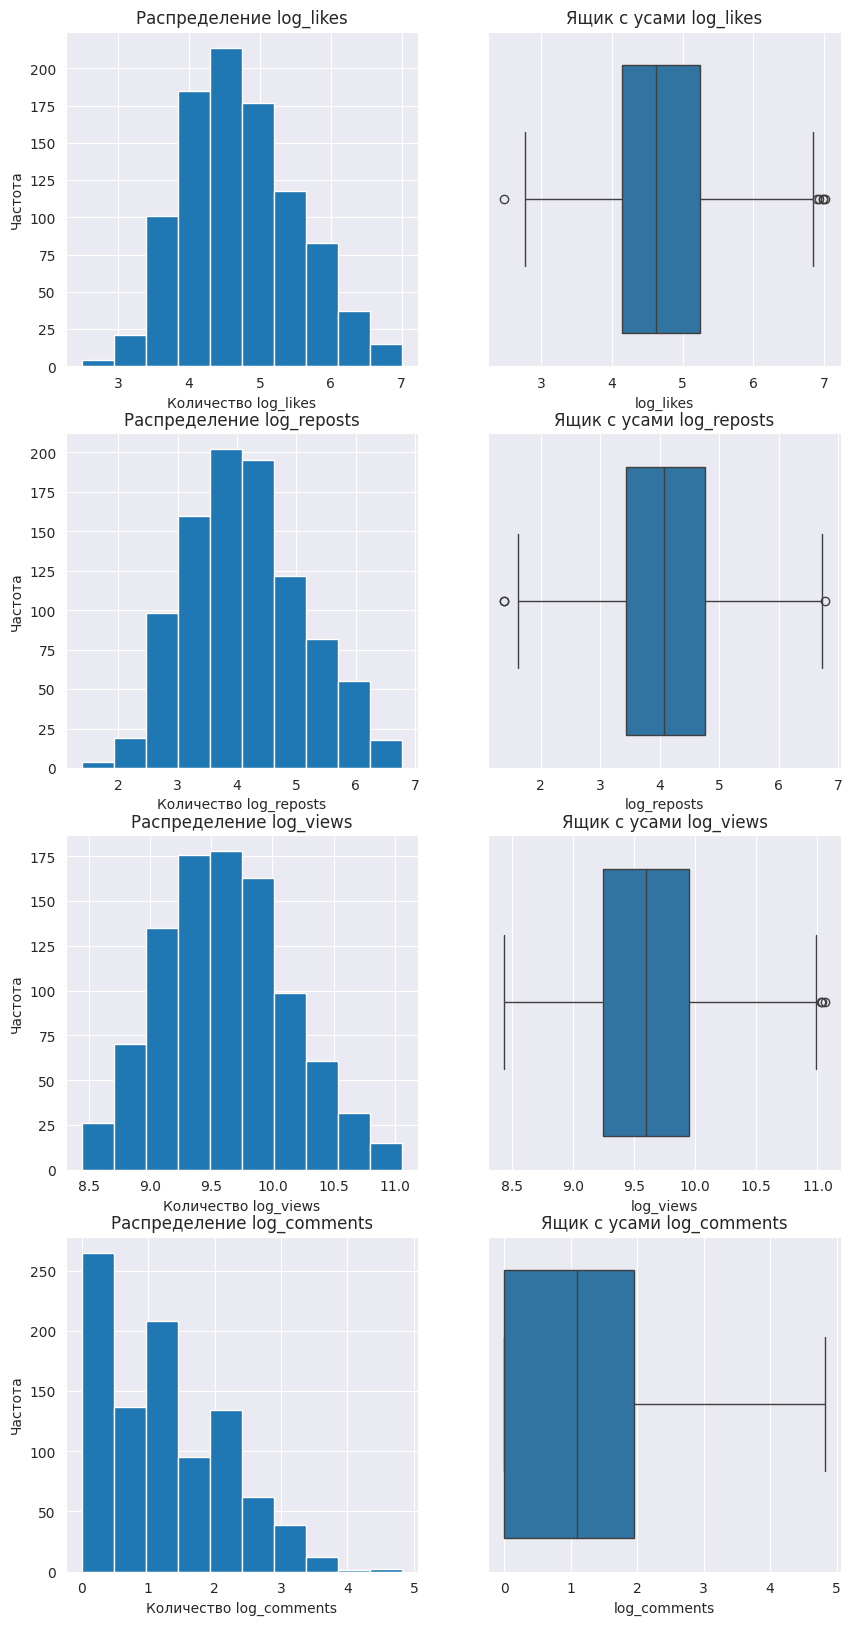

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('darkgrid')
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
for i in range(len(log_var_num)):
    ax[i][0].set_title(f'Распределение {log_var_num[i]}')
    ax[i][1].set_title(f'Ящик с усами {log_var_num[i]}')
    ax[i][0].hist(df3[log_var_num[i]])
    ax[i][0].set_xlabel(f'Количество {log_var_num[i]}')
    ax[i][0].set_ylabel('Частота')
    sns.boxplot(x=df3[log_var_num[i]], ax=ax[i, 1])

От выбросов мы не смогли избавиться до конца, поэтому повторим процедуру еще раз.

In [56]:
for i in log_var_num:
    left, right = outliers(i)
    df3 = df3[(df3[i] > left) & (df3[i] < right)]

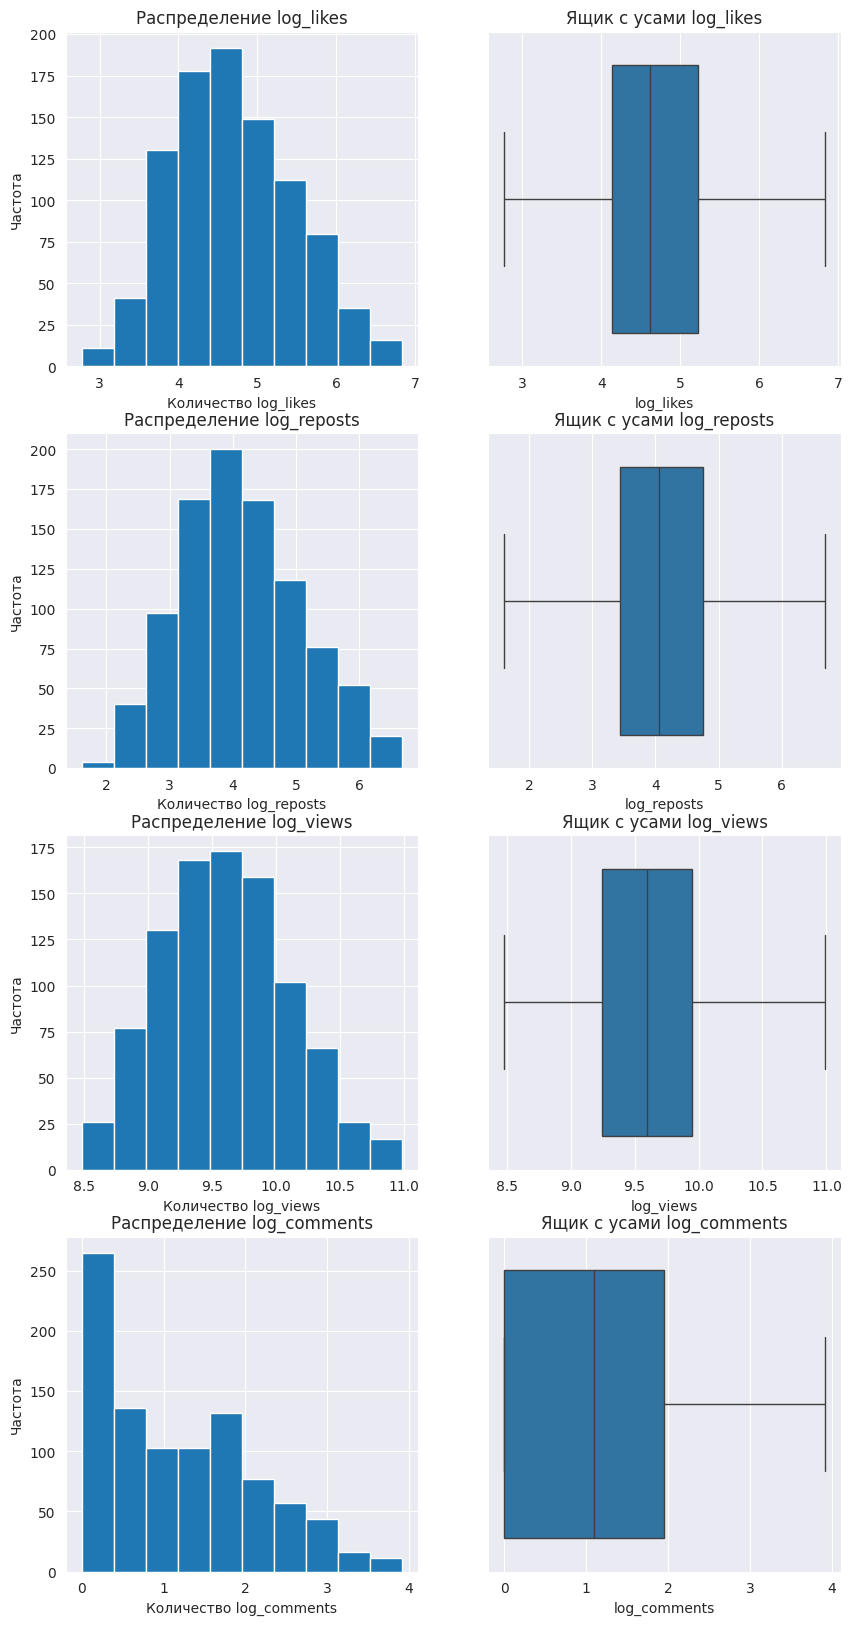

In [57]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
for i in range(len(log_var_num)):
    ax[i][0].set_title(f'Распределение {log_var_num[i]}')
    ax[i][1].set_title(f'Ящик с усами {log_var_num[i]}')
    ax[i][0].hist(df3[log_var_num[i]])
    ax[i][0].set_xlabel(f'Количество {log_var_num[i]}')
    ax[i][0].set_ylabel('Частота')
    sns.boxplot(x=df3[log_var_num[i]], ax=ax[i, 1])

Теперь мы видим, что распределения похожи на нормальные, а выбросы отсутствуют. Что касается комментариев, то из-за практически полной дискретности величины добиться нормализации не удалось, но, поскольку мы в дальнейшем будем рассматривать кумулятивные признаки, включение комментариев в сумму других действий аудитории не создаст перекос из-за малых значений параметра. Поэтому столбец с комментариями мы удалять не будем из соображения ценности имеющихся данных.

In [58]:
df3.shape

(944, 19)

После очистки данных от выбросов и логарифмизации у нас осталось 944 наблюдения.

# **Создание новых признаков**

Потенциально заказчику исследования может быть интересно отсмотреть конкретные метрики активности аудитории. Для этой цели может быть рассчитана метрика Engagement Rate by Views, ER View - соотношение всех целевых активностей аудитории (лайки, репосты, комментарии) к просмотрам. Для этого создадим два признака - сумму всех активностей аудитории (reactions), соотношение активности аудитории к просмотрам (ER). В сумме каждый из видов активности будет иметь вес равный единице, поскольку мы презюмируем, что любая активность со стороны аудитории одинаково желанна заказчиком.

Мы считаем, что рассмотрение лайков/просмотров/комментариев/репостов в лоб - это недостаточно, поскольку лайки/репосты/комментарии объективно будут как-то зависеть от просмотров, а сами просмотры зачастую будут задаваться стохастически, не завися от каких-то задаваемых нами параметров (*c'est la vie)*. Будем считать просмотры экзогенной переменной, от которой зависит все остальное. Поэтому, чтобы не привязываться к факторам, на которые мы повлиять не в силах, мы будем изучать уровень активности аудитории на ER.

In [59]:
df3['reactions'] = df3['likes'] + df3['reposts'] + df3['comments']

In [60]:
df3['ER'] = df3['reactions'] / df3['views'] * 100

In [61]:
df3

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,...,oscar_nominee,palme_winner,globe_winner,movie_flg,log_likes,log_reposts,log_views,log_comments,reactions,ER
1,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,,...,0.0,0.0,0.0,True,3.850148,3.433987,8.672828,1.386294,79,1.352508
2,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",...,0.0,0.0,0.0,True,5.616771,6.331502,10.355773,1.386294,838,2.665649
3,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,...,NaN,NaN,NaN,False,4.744932,3.951244,9.501741,0.693147,166,1.240472
4,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,...,NaN,NaN,NaN,False,5.043425,3.178054,9.545311,0.693147,178,1.273430
5,102,82,13583,3,9,"«Соблазн», 2001 год. \nРежиссер: Майкл Кристофер.",Соблазн,Майкл Кристофер,2001,,...,0.0,0.0,0.0,True,4.634729,4.418841,9.516648,1.386294,187,1.376721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,40,29,7117,3,9,"Фильмы, в которых зеркала и их образы имеют ва...",NaN,NaN,0,"Фильмы, в которых зеркала и их образы имеют ва...",...,NaN,NaN,NaN,False,3.713572,3.401197,8.870382,1.386294,72,1.011662
998,89,11,9104,1,1,"Милла Йовович в объективе Криса Флойда, 1994 📸",NaN,NaN,1994,"Милла Йовович в объективе Криса Флойда, 📸",...,NaN,NaN,NaN,False,4.499810,2.484907,9.116579,0.693147,101,1.109402
999,68,35,9751,0,9,"«Человек, который лжёт», 1968 год. \nРежиссер:...","Человек, который лжёт",Ален Роб-Грийе,1968,,...,0.0,0.0,0.0,True,4.234107,3.583519,9.185228,0.000000,103,1.056302
1000,196,183,17351,9,9,"«Печальная баллада для трубы», 2010 год. \nРеж...",Печальная баллада для трубы,Алекс де ла Иглесиа,2010,,...,0.0,0.0,0.0,True,5.283204,5.214936,9.761463,2.302585,388,2.236182


Рассмотрим связь между целевым показателем и остальными переменными с помощью гистограммы рассеивания. Разделим наш датасет на 2 отдельных - movies (где посты посвящены фильмам) и pictures (где посты посвящены не фильмам).

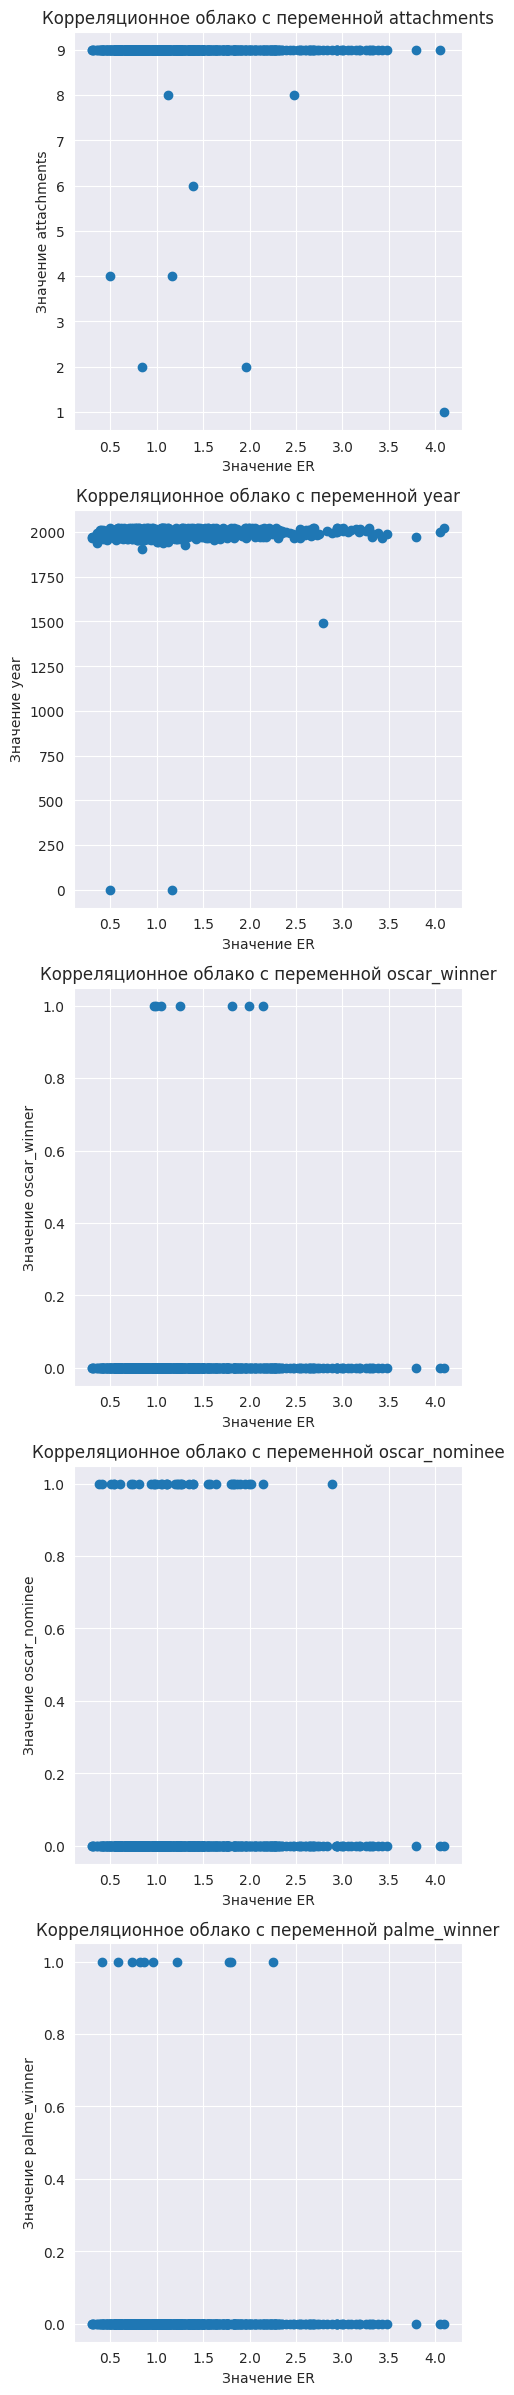

In [62]:
movies = df3[df3['movie_flg']==True]
var_cat = ['attachments', 'year', 'oscar_winner', 'oscar_nominee', 'palme_winner']
sns.set_style('darkgrid')
fig, ax = plt.subplots((len(var_cat)), 1,  figsize=(5, 30))
for i in range (len(var_cat)):
    ax[i].set_title(f'Корреляционное облако с переменной {var_cat[i]}')
    ax[i].scatter(movies['ER'], movies[var_cat[i]])
    ax[i].set_xlabel('Значение ER')
    ax[i].set_ylabel(f'Значение {var_cat[i]}')

Рассмотрим колонку year. Нас интересуют 3 значения: 2 с нулевым годом и одно с 1500м годом.

In [63]:
movies[movies['year']<=1600]

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,...,oscar_nominee,palme_winner,globe_winner,movie_flg,log_likes,log_reposts,log_views,log_comments,reactions,ER
152,103,87,16511,3,4,«Вампирша-гуманистка ищет отчаянного доброволь...,Вампирша-гуманистка ищет отчаянного добровольца,Ариан Луи-Сэз,0,С 11 апреля в кино,...,0.0,0.0,0.0,True,4.644391,4.477337,9.711843,1.386294,193,1.168918
172,333,259,21507,8,9,"«1492: Завоевание рая», 1992 год.\nРежиссер: Р...",1492: Завоевание рая,Ридли Скотт,1492,,...,0.0,0.0,0.0,True,5.811141,5.560682,9.976180,2.197225,600,2.789789
329,27,16,8724,0,4,«Демоны дома Гарретов»\nРежиссер: Пэрис Зарсил...,Демоны дома Гарретов,Пэрис Зарсилья,0,С 14 марта в кино,...,0.0,0.0,0.0,True,3.332205,2.833213,9.073948,0.000000,43,0.492893


Из-за наличия цифр в названии в строке 172 неправильно определился год. Изменим это вручную. С отсавшимися двумя колонками мы уже работали, восстановим в них год вручную (проблема с определением года связана с нарушением naming conventions, авторы поста не написали год выпуска).

In [64]:
movies.loc[movies['movie']=='1492: Завоевание рая', 'year'] = 1992
movies.loc[movies['movie']=='Вампирша-гуманистка ищет отчаянного добровольца', 'year'] = 2023
movies.loc[movies['movie']=='Демоны дома Гарретов', 'year'] = 2023

Рассмотрим облако рассеяния по году с измененными данными:

<Axes: xlabel='ER', ylabel='year'>

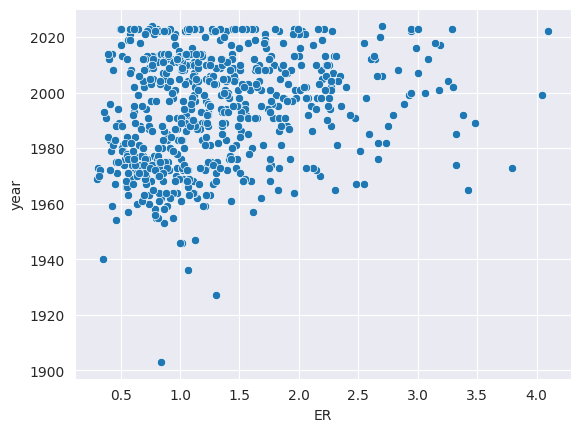

In [65]:
sns.scatterplot(x=movies['ER'], y=movies['year'])

Можно предположить нелинейную положительную зависимость между годом выпуска и соотношением реакций. Чем моложе фильм, тем, в общем случае, больше отношение реакций к просмотрам. Отметим также, что максимальное значение ER встречается у свежих фильмов - в районе 2020 и 2000 годов соответственно.

Рассмотрим также остальные категориальные показатели. Связь можно увидеть со значением переменной attachments. Самые большие показатели реакций у постов с 9 приложениями. Однако это можно объяснить тем, что таких постов большинство в выборке. Значение переменной oscar_winner несильно влияет на ER. Это можно было бы также связать с тем, что таких постов меньшинство, однако переменная oscar_nominee показывает, что номинирование фильма на "Оскар" также не сильно оказывало влияния на значение переменной. Победа в "Золотой Пальмовой Ветви" также не сильно влияет на показатели.

Теперь рассмотрим влияние режиссера на реакцию аудитории. Выведем топ самых любимых режиссеров аудитории и сравним с самыми часто публикуемыми режиссерами.

In [66]:
ranked_directors = df3.groupby('director')['ER'].mean().reset_index()
ranked_directors = ranked_directors.sort_values(by='ER', ascending=False)
ranked_directors

,director,ER
184,Кевин Смит,4.046874
134,Доменико Паолелла,3.789946
375,Уильям Уайлер,3.424901
155,Жан-Жак Анно,3.383801
58,Валериан Боровчик,3.318571
...,...,...
335,Рольф де Хир,0.357378
265,Митчелл Лейзен,0.353461
325,Роберт Маллиган,0.328147
266,"Михаэль Фенглер, Райнер Вернер Фасбиндер",0.315827


Теперь сравним с рейтингом самых публикуемых режиссеров.

In [67]:
publ_directors = df3['director'].value_counts().reset_index()
publ_directors.columns = ['director', 'count']
publ_directors = publ_directors.sort_values(by='count', ascending=False)
publ_directors

,director,count
0,Стивен Содерберг,8
2,Брайан де Пальма,7
3,Мартин Скорсезе,7
1,Стивен Спилберг,7
4,Ридли Скотт,6
...,...,...
216,"Жан-Пьер Жёне, Марк Каро",1
215,Виктор Шамиров,1
214,Лоне Схерфиг,1
213,Мел Брукс,1


In [68]:
correlation_coefficient = publ_directors['count'].corr(ranked_directors['ER'])


In [69]:
correlation_coefficient

-0.016923387903094517

Как мы можем заметить, есть даже некоторая отрицательная корреляция, пусть и даже небольшая, что означает, что авторы паблика не обращают внимания на популярность режиссера среди аудитории, а ориентируются чисто на собственные предпочтения в выборе контента. Даже без последующих рассуждений очевидно, что, если авторы хотят увеличить степень вовлеченности аудитории, то им нужно переориентироваться на других режиссеров.

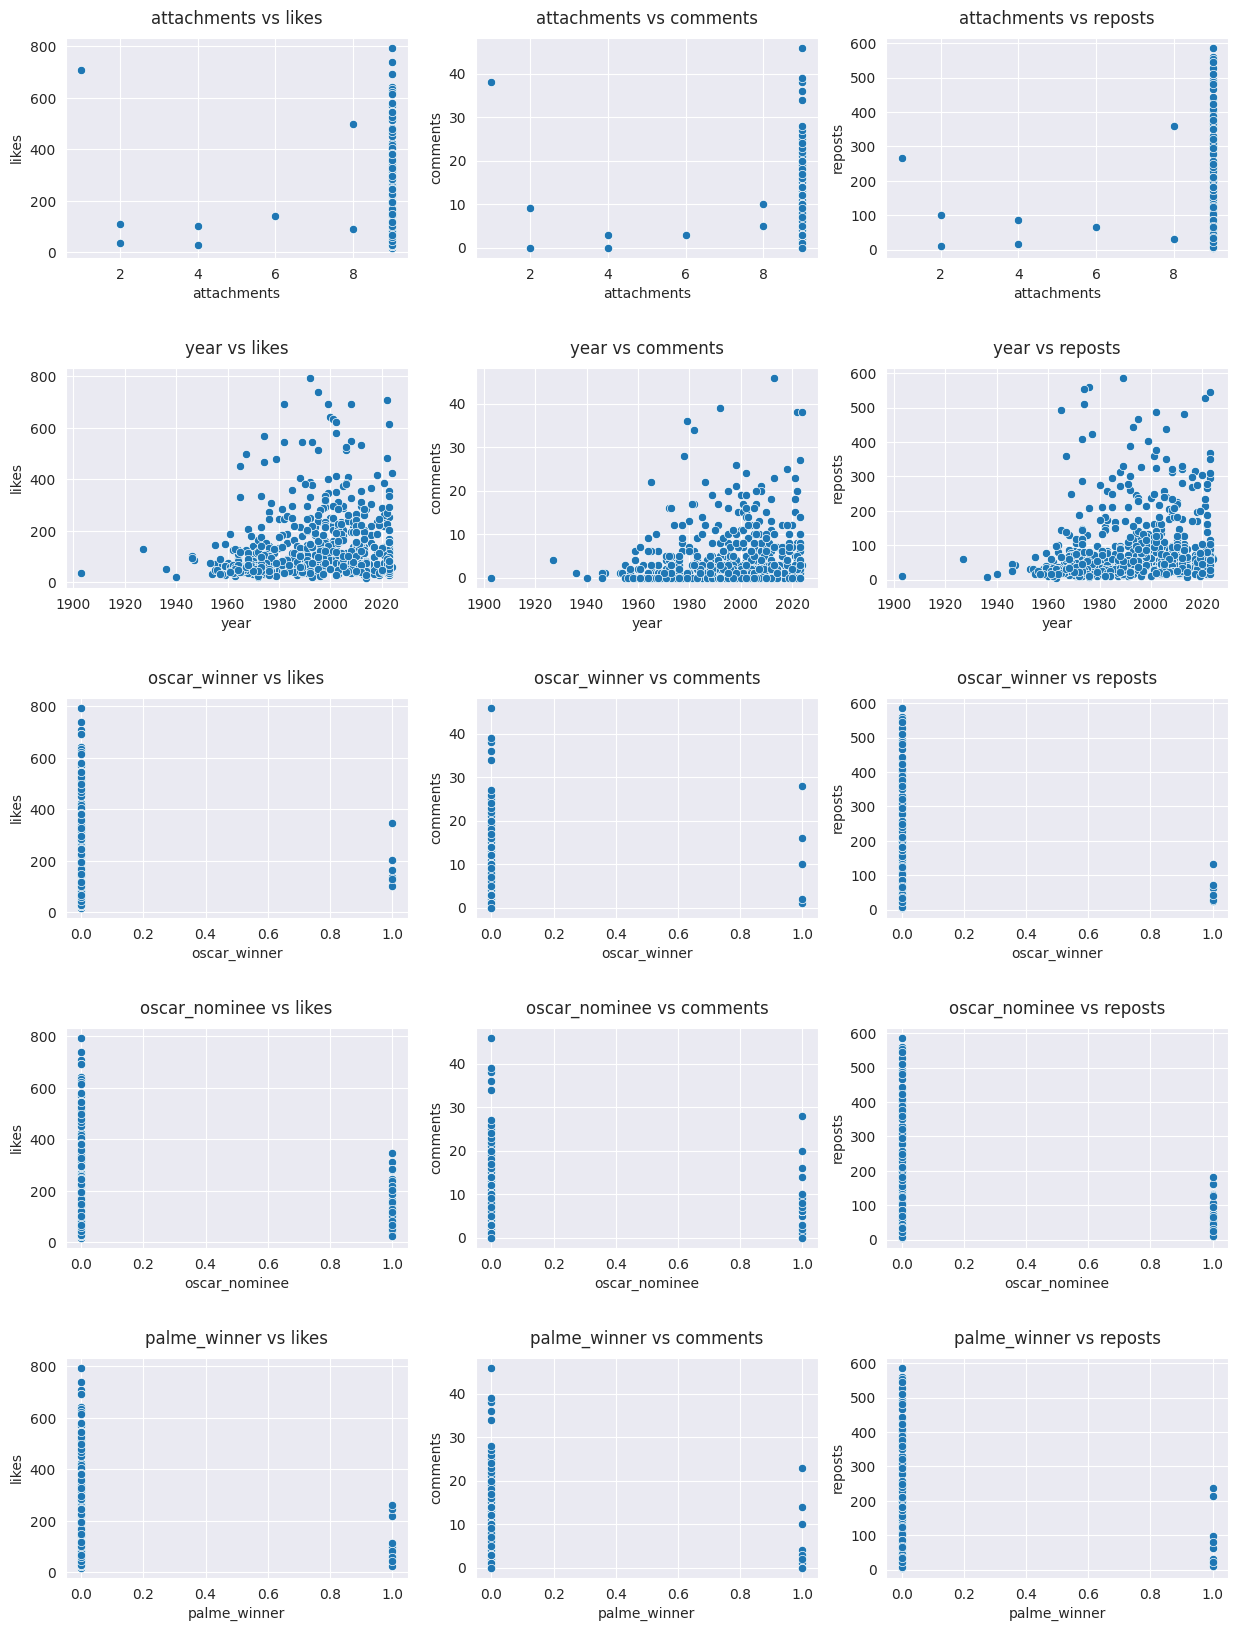

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

var_cat = ['attachments', 'year', 'oscar_winner', 'oscar_nominee', 'palme_winner']
predictors = ['likes', 'comments', 'reposts']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(var_cat), len(predictors), figsize=(15, 20))

for i, var in enumerate(var_cat):
    for j, pred in enumerate(predictors):
        sns.scatterplot(x=movies[var], y=movies[pred], ax=axes[i, j])
        axes[i, j].set_title(f'{var} vs {pred}', pad=10)
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel(pred)
        axes[i, j].grid(True)

plt.subplots_adjust(hspace=0.5)

plt.show()

Как мы можем заметить, рассмотрение переменных по отдельности не дало нам новых инсайтов насчет закономерностей в данных, поскольку тенденции в каждой конкретной категории схожи с тем, что происходит при оценке ER.

Теперь проанализируем группу, в которой есть только картинки без упоминания фильмов.

In [71]:
visuals = df3[df3['movie_flg'] == 0]

Поскольку нам нужно понять, какие посты пользуются успехом, а практически все категории будут зависеть от наличия фильма в посте (например, номинация на оскар/другую награду/режиссер/год выпуска), то есть смысл просто посмотреть на меры центральной тенденции в двух категориях и понять, какая из них оказывается более популярной.

In [72]:
movies['ER'].mean()


1.3158980867768593

In [73]:
visuals['ER'].mean()

1.4701568351420486

In [74]:
movies['ER'].median()

1.142258265979525

In [75]:
visuals['ER'].median()

1.2587558567607369

In [76]:
movies['ER'].mode()

0    0.541196
1    1.110966
Name: ER, dtype: float64

In [77]:
visuals['ER'].mode()

0      0.239854
1      0.270369
2      0.320871
3      0.344432
4      0.355901
         ...   
309    3.722936
310    3.838507
311    3.842558
312    3.912756
313    4.482161
Name: ER, Length: 314, dtype: float64

In [78]:
movies['ER'].std()

0.6712150416984413

In [79]:
visuals['ER'].std()

0.788374919543457

В ходе исследования второй группы постов, мы выяснили, что:


1.   В среднем аудитория на них более бурно реагирует: это видно из более высоких показателей и медианы, и среднего
2.   Если первая группа постов условно может делиться на "успешные" (которые находятся вокруг второй моды) и "провальные" (которые находятся вокруг первой моды), то вторая группа не может быть разделена на подгруппы вовсе, потому что ни одно значение показателя там не повторяется, и поэтому распределение не собирается вокруг какого-то популярного значения.
3.   Из-за этого мы еще и проверили стандартное отклонение: вторая группа постов в этом смысле более рискованная для публикации, потому что там стандартное отклонение выше.

Дополнительно мы провизуализировали распределение таргетной переменной для второй группы публикаций.



<Axes: xlabel='ER', ylabel='Count'>

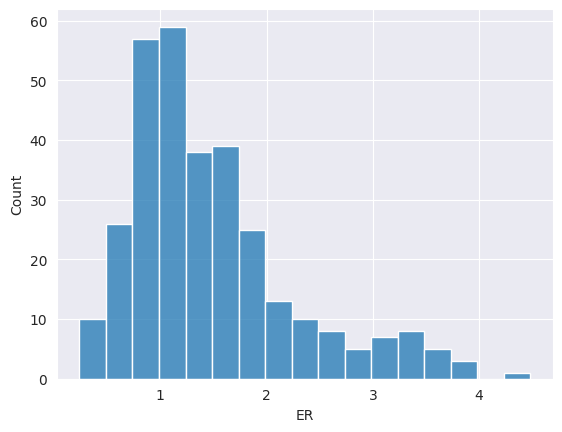

In [80]:
sns.histplot(visuals['ER'])

# **Гипотезы**

В ходе EDA мы обнаружили ряд закономерностей, которые бы хотелось проверить на статистическую значимость и вообще на присутствие в данных.



1. Аудитория активнее взаимодействует с более свежими фильмами по сравнению со старыми фильмами
2. Титулованность фильма не будет влиять на отклик аудитории или будет влиять отрицательно
3. Если публикация вовсе не содержит информацию о каком-то фильме, а состоит лишь из каких-то картинок, то пост может быть более успешен.
4. Количество реакций на посте не зависит от количества просмотров поста
5. Люди больше взаимодействуют с постами с просто картинкам больше, нежели чем с постами, посвященными фильмам



In [81]:
movies/head

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,...,oscar_nominee,palme_winner,globe_winner,movie_flg,log_likes,log_reposts,log_views,log_comments,reactions,ER
1,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,,...,0.0,0.0,0.0,True,3.850148,3.433987,8.672828,1.386294,79,1.352508
2,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",...,0.0,0.0,0.0,True,5.616771,6.331502,10.355773,1.386294,838,2.665649
5,102,82,13583,3,9,"«Соблазн», 2001 год. \nРежиссер: Майкл Кристофер.",Соблазн,Майкл Кристофер,2001,,...,0.0,0.0,0.0,True,4.634729,4.418841,9.516648,1.386294,187,1.376721
6,348,132,26569,1,9,"«Красота по-американски», 1999 год. \nРежиссер...",Красота по-американски,Сэм Мендес,1999,,...,1.0,0.0,1.0,True,5.855072,4.890349,10.187538,0.693147,481,1.810381
7,512,172,32902,8,9,"«Дневник баскетболиста», 1995 год. \nРежиссер:...",Дневник баскетболиста,Скотт Кэлверт,1995,,...,0.0,0.0,0.0,True,6.240276,5.153292,10.401319,2.197225,692,2.103216
